# File and Folder

In [23]:
import os
os.listdir()

['.ipynb_checkpoints',
 '7_SVM.ipynb',
 'DecisionTree.ipynb',
 'DT.pkl',
 'DT_RT.ipynb',
 'DT_RT_2.ipynb',
 'Employee_attrition_Logistic.csv',
 'Flask_DT.ipynb',
 'framingham_Logistic.csv',
 'heart_logistic.csv',
 'LogisticRegression.ipynb',
 'LR_1.ipynb',
 'MLR_1.ipynb',
 'ModelPickle.ipynb',
 'movie_review_test.csv',
 'movie_review_train.csv',
 'Pearson_SimpleLinear.txt',
 'Person.txt',
 'SLR_1.ipynb',
 'student-por.csv',
 'test_DecisionTree.csv',
 'Train and test.zip',
 'train_DecisionTree.csv',
 'wine+quality.zip',
 'winequality-red_multilinear.csv',
 'winequality-white_multilinear.csv',
 '__pycache__']

# Read Data

In [24]:
import pandas as pd
data=pd.read_csv("heart_logistic.csv").iloc[:,:-1]
data

,age,sex,pain type,BP,cholestrol,fbs,resting ecg,max heart rate,exercise angina,ST depression,ST slope,flouroscopy coloured,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,1
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,1
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,1
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,1


# Clean up data

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   270 non-null    int64  
 1   sex                   270 non-null    int64  
 2   pain type             270 non-null    int64  
 3   BP                    270 non-null    int64  
 4   cholestrol            270 non-null    int64  
 5   fbs                   270 non-null    int64  
 6   resting ecg           270 non-null    int64  
 7   max heart rate        270 non-null    int64  
 8   exercise angina       270 non-null    int64  
 9   ST depression         270 non-null    float64
 10  ST slope              270 non-null    int64  
 11  flouroscopy coloured  270 non-null    int64  
 12  thal                  270 non-null    int64  
 13  heart disease         270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


In [26]:
data.isnull().sum()

age                     0
sex                     0
pain type               0
BP                      0
cholestrol              0
fbs                     0
resting ecg             0
max heart rate          0
exercise angina         0
ST depression           0
ST slope                0
flouroscopy coloured    0
thal                    0
heart disease           0
dtype: int64

In [27]:
col=data.columns
col

Index(['age', 'sex', 'pain type', 'BP', 'cholestrol', 'fbs', 'resting ecg',
       'max heart rate', 'exercise angina', 'ST depression', 'ST slope',
       'flouroscopy coloured', 'thal', 'heart disease'],
      dtype='object')

# Plot - pairplot and heatmap

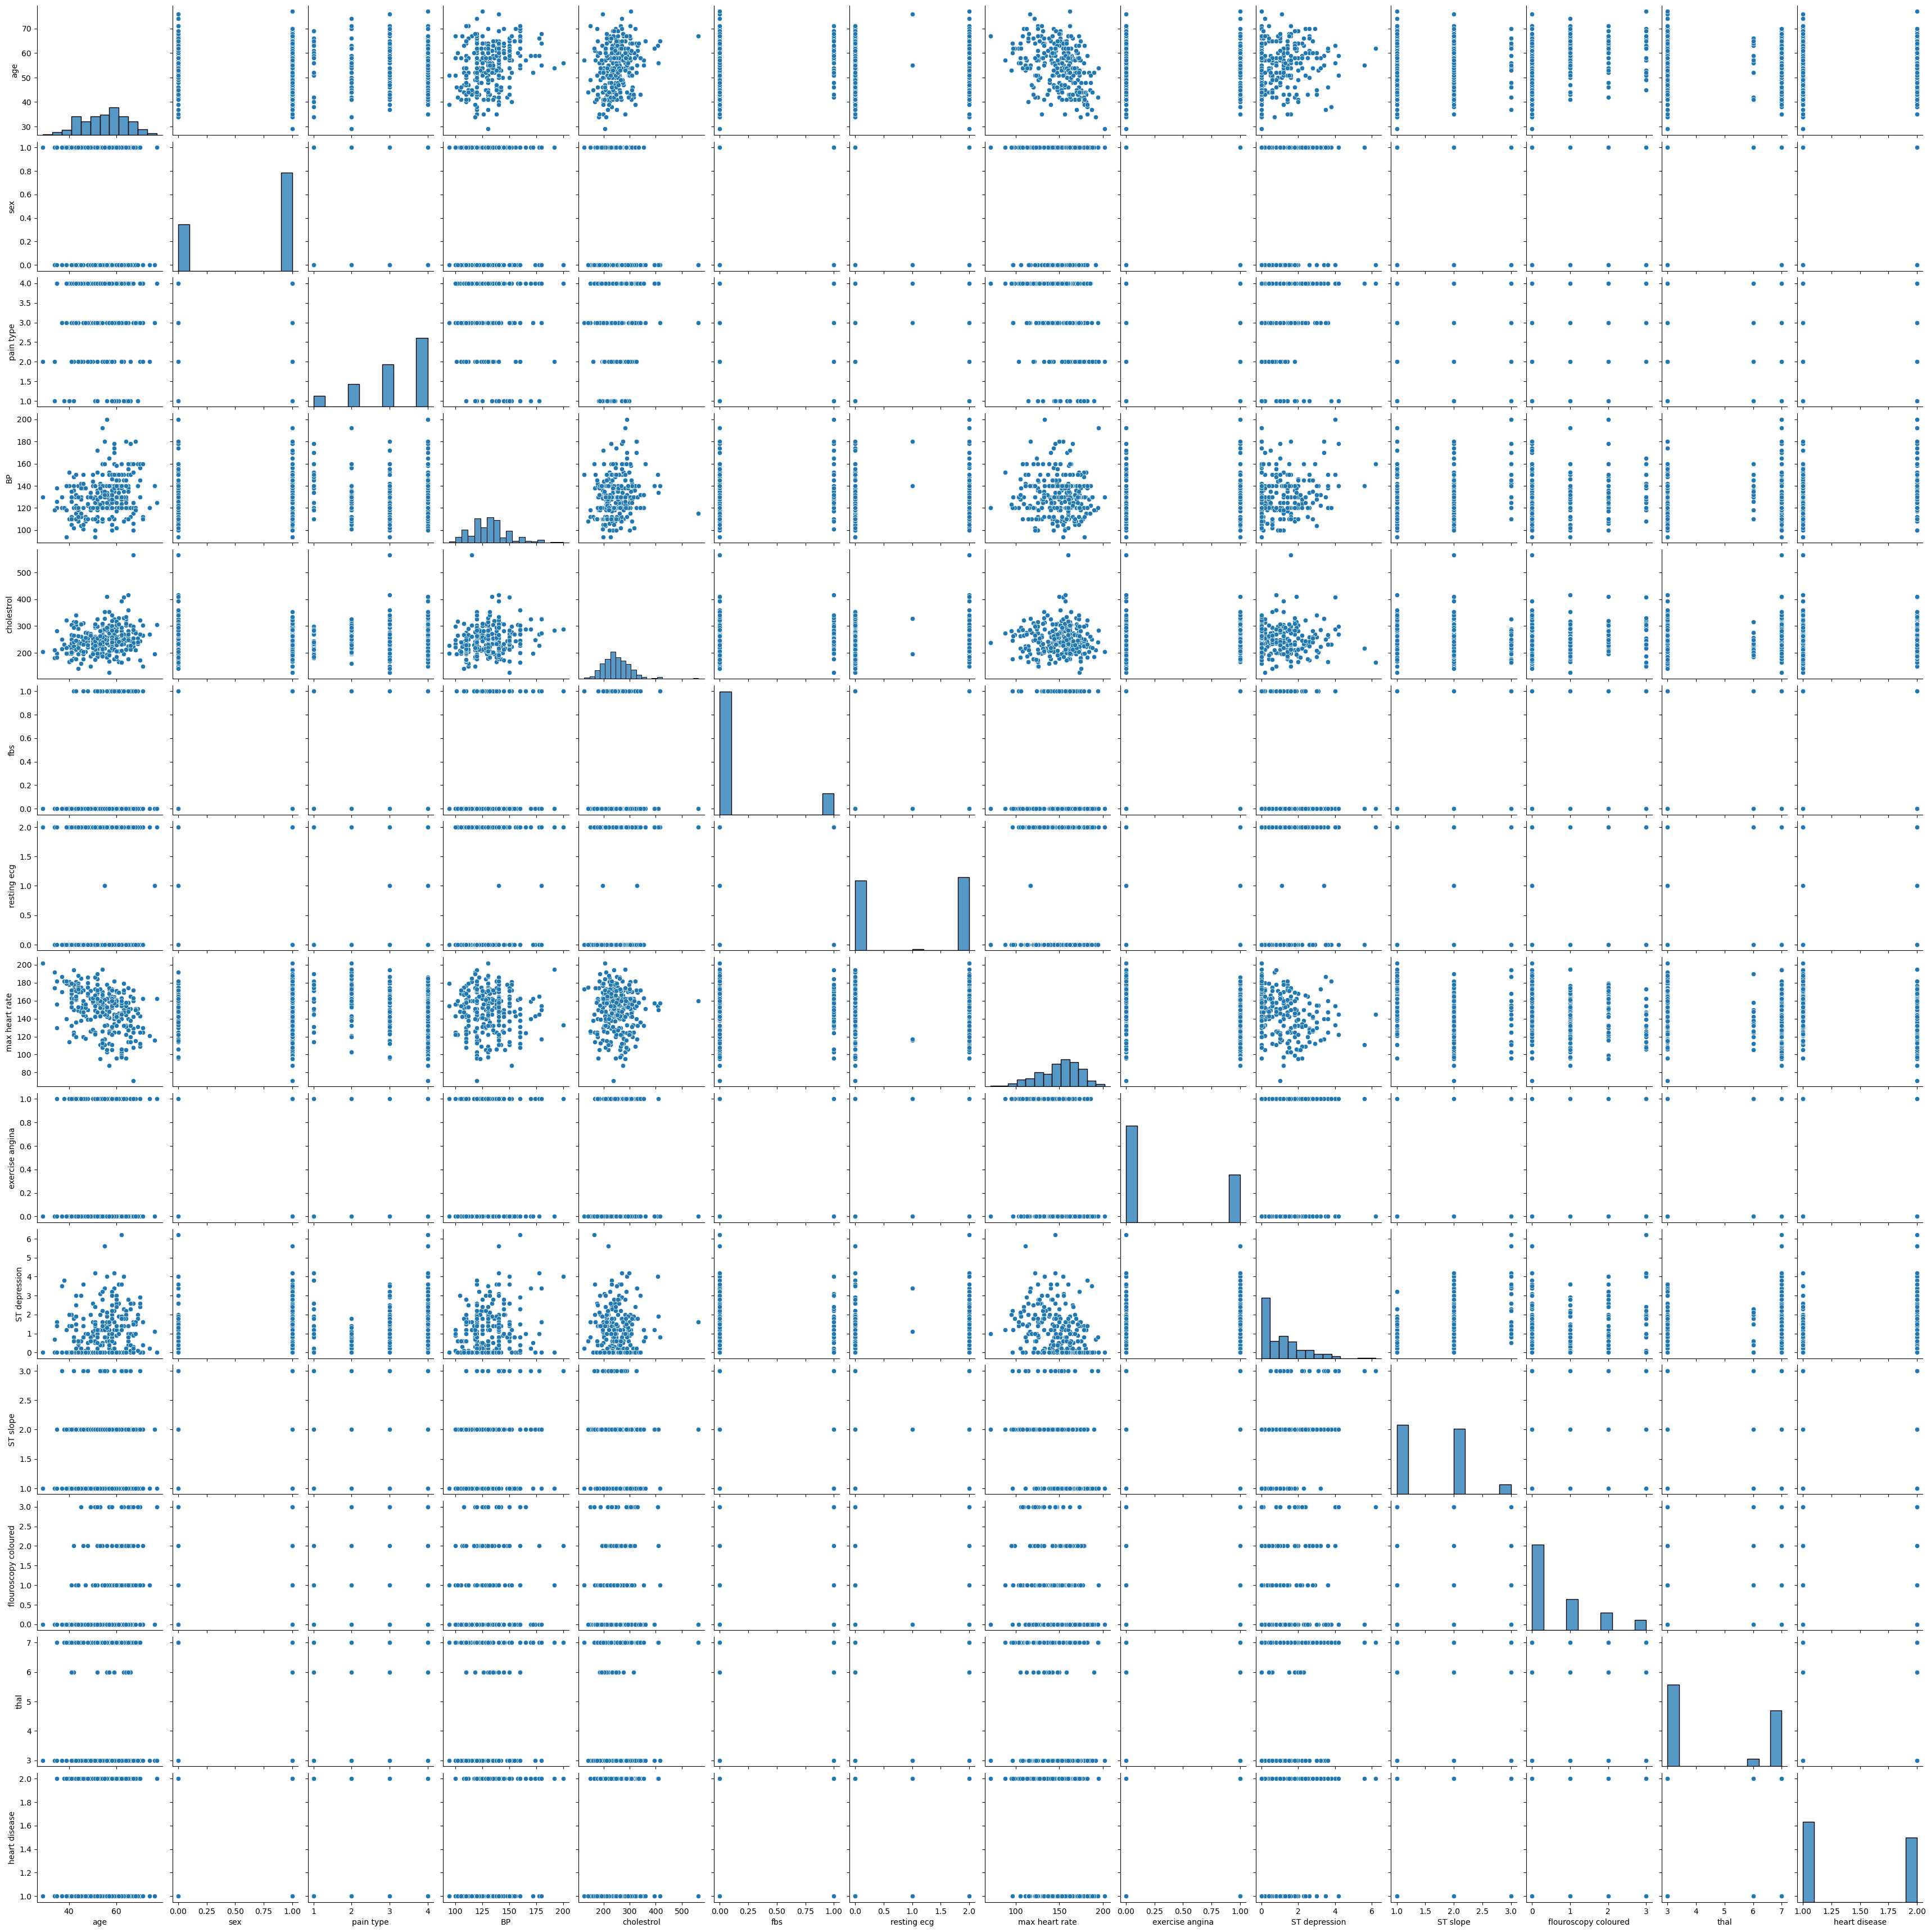

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data)
plt.show()

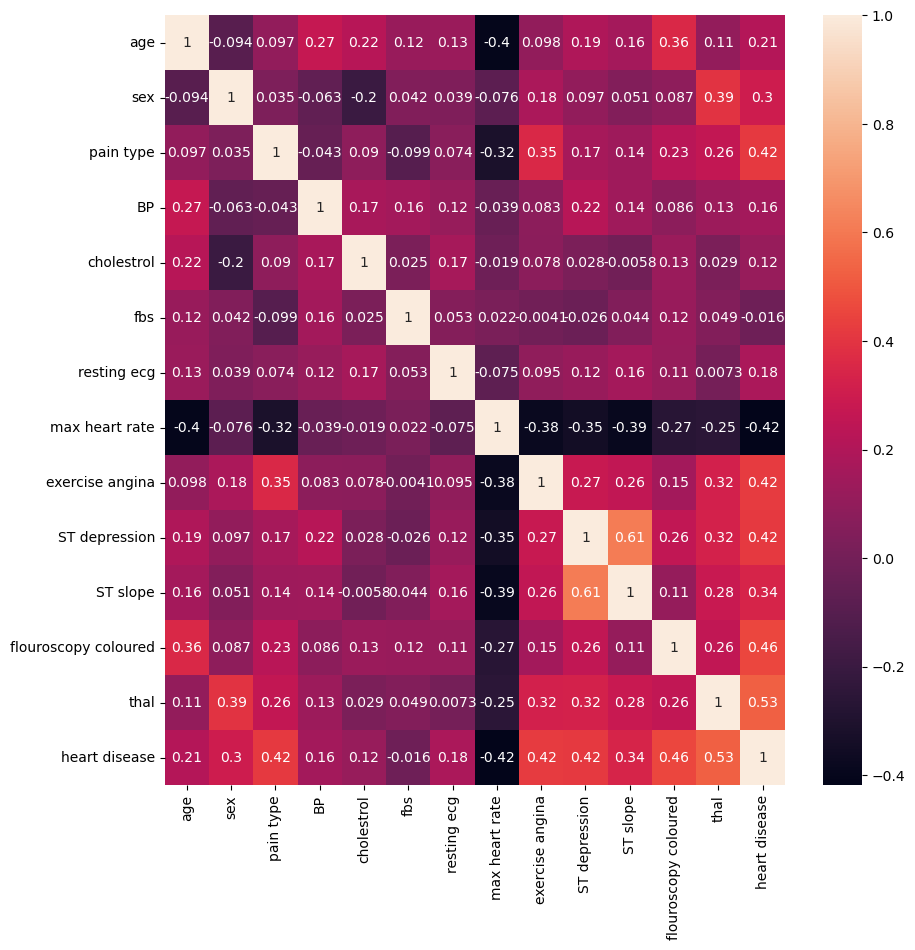

In [29]:
plt.figure(figsize=[10,10])
sns.heatmap(data.corr(),annot=True)
plt.show()

# Train data

In [30]:
col=data.columns
print(col)
x=data[["age","pain type","exercise angina","ST depression","ST slope","flouroscopy coloured","thal"]]
y=data["heart disease"]

Index(['age', 'sex', 'pain type', 'BP', 'cholestrol', 'fbs', 'resting ecg',
       'max heart rate', 'exercise angina', 'ST depression', 'ST slope',
       'flouroscopy coloured', 'thal', 'heart disease'],
      dtype='object')


In [31]:
x

,age,pain type,exercise angina,ST depression,ST slope,flouroscopy coloured,thal
0,70,4,0,2.4,2,3,3
1,67,3,0,1.6,2,0,7
2,57,2,0,0.3,1,0,7
3,64,4,1,0.2,2,1,7
4,74,2,1,0.2,1,1,3
...,...,...,...,...,...,...,...
265,52,3,0,0.5,1,0,7
266,44,2,0,0.0,1,0,7
267,56,2,0,1.3,2,0,3
268,57,4,0,0.4,2,0,6


In [32]:
y

0      2
1      1
2      2
3      1
4      1
      ..
265    1
266    1
267    1
268    1
269    2
Name: heart disease, Length: 270, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
print("Lenght of x_train : ",len(x_train))
print("Lenght of y_train : ",len(y_train))
print("Lenght of x_test : ",len(x_test))
print("Lenght of y_test : ",len(y_test))

Lenght of x_train :  189
Lenght of y_train :  189
Lenght of x_test :  81
Lenght of y_test :  81


In [34]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

# Predict value

In [35]:
y_pred=model.predict(x_test)
print(y_pred)

[1 1 2 1 2 2 2 2 1 1 2 2 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 2 1 2 1 2
 2 1 2 1 2 2 2 1 1 1 2 2 2 1 1 1 1 1 1 2 1 1 1 2 1 1 1 2 1 1 2 1 2 1 2 1 2
 1 1 2 1 2 1 1]


# Evaluation metrics

In [36]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
conf_mat=confusion_matrix(y_test,y_pred)
class_rep=classification_report(y_test,y_pred)
train_score=model.score(x_train,y_train)
test_score=model.score(x_test,y_test)
model_interc=model.intercept_
model_coef=model.coef_
model_r2s=r2_score(y_test,y_pred)
model_mae=mean_absolute_error(y_test,y_pred)
model_mse=mean_squared_error(y_test,y_pred)
model_rmse=np.sqrt(model_mse)

print("Confusion matrix : \n",conf_mat)
print("Classification report : \n",class_rep)
print("Train score : ",train_score)
print("Test score : ",test_score)
print("Model intercept : ",model_interc)
print("Model coefficient : ",model_coef)
print("Model R2 score : ",model_r2s)
print("Model mean abs err : ",model_mae)
print("Model sq abs err : ",model_mse)
print("Model root mean sq err : ",model_rmse)

Confusion matrix : 
 [[38  7]
 [11 25]]
Classification report : 
               precision    recall  f1-score   support

           1       0.78      0.84      0.81        45
           2       0.78      0.69      0.74        36

    accuracy                           0.78        81
   macro avg       0.78      0.77      0.77        81
weighted avg       0.78      0.78      0.78        81

Train score :  0.8677248677248677
Test score :  0.7777777777777778
Model intercept :  [-7.6500409]
Model coefficient :  [[1.01596820e-03 7.67892690e-01 9.01656363e-01 1.94481212e-01
  5.15995344e-01 1.09791974e+00 5.81757618e-01]]
Model R2 score :  0.09999999999999998
Model mean abs err :  0.2222222222222222
Model sq abs err :  0.2222222222222222
Model root mean sq err :  0.4714045207910317


# SVM (Support vector machine)

In [40]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)

SVC()

In [41]:
y_pred=model.predict(x_test)
print(y_pred)

[1 1 2 1 2 2 2 2 2 1 2 2 1 1 1 2 2 2 1 2 2 1 2 1 2 1 1 2 1 1 1 1 2 1 1 1 2
 2 1 1 1 2 2 1 1 2 1 2 2 2 1 1 1 2 1 1 1 1 2 1 2 1 1 2 2 2 1 2 1 2 2 1 1 2
 1 1 2 1 1 2 1]


In [44]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
conf_mat=confusion_matrix(y_test,y_pred)
class_rep=classification_report(y_test,y_pred)
train_score=model.score(x_train,y_train)
test_score=model.score(x_test,y_test)
model_interc=model.intercept_
#model_coef=model.coef_
model_r2s=r2_score(y_test,y_pred)
model_mae=mean_absolute_error(y_test,y_pred)
model_mse=mean_squared_error(y_test,y_pred)
model_rmse=np.sqrt(model_mse)

print("Confusion matrix : \n",conf_mat)
print("Classification report : \n",class_rep)
print("Train score : ",train_score)
print("Test score : ",test_score)
print("Model intercept : ",model_interc)
#print("Model coefficient : ",model_coef)
print("Model R2 score : ",model_r2s)
print("Model mean abs err : ",model_mae)
print("Model sq abs err : ",model_mse)
print("Model root mean sq err : ",model_rmse)

Confusion matrix : 
 [[29 16]
 [15 21]]
Classification report : 
               precision    recall  f1-score   support

           1       0.66      0.64      0.65        45
           2       0.57      0.58      0.58        36

    accuracy                           0.62        81
   macro avg       0.61      0.61      0.61        81
weighted avg       0.62      0.62      0.62        81

Train score :  0.746031746031746
Test score :  0.6172839506172839
Model intercept :  [-0.33282784]
Model R2 score :  -0.55
Model mean abs err :  0.38271604938271603
Model sq abs err :  0.38271604938271603
Model root mean sq err :  0.6186404847588913


# Decision tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

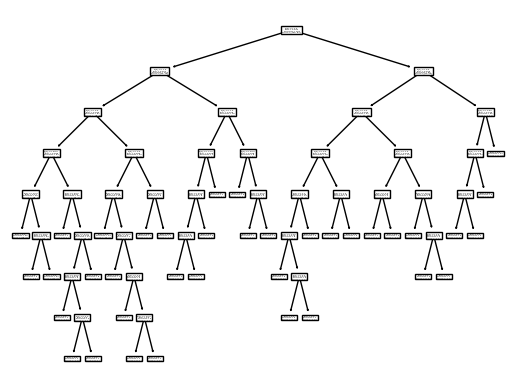

In [39]:
from sklearn import tree
tree.plot_tree(model)
plt.show()

# Random forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

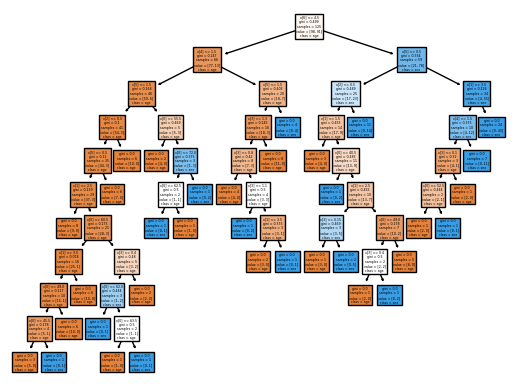

In [66]:
from sklearn import tree
tree.plot_tree(model.estimators_[0],class_names=['age', 'sex', 'pain type', 'BP', 'cholestrol', 'fbs', 'resting ecg','max heart rate', 'exercise angina', 'ST depression', 'ST slope','flouroscopy coloured', 'thal', 'heart disease'], filled=True)#,class_names=["age","pain type","exercise angina","ST depression","ST slope","flouroscopy coloured","thal"])
plt.show()

In [59]:
data

,age,sex,pain type,BP,cholestrol,fbs,resting ecg,max heart rate,exercise angina,ST depression,ST slope,flouroscopy coloured,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,1
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,1
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,1
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,1


RMSE: 2.1556471928681753
R^2 Score: 0.8042050776988191


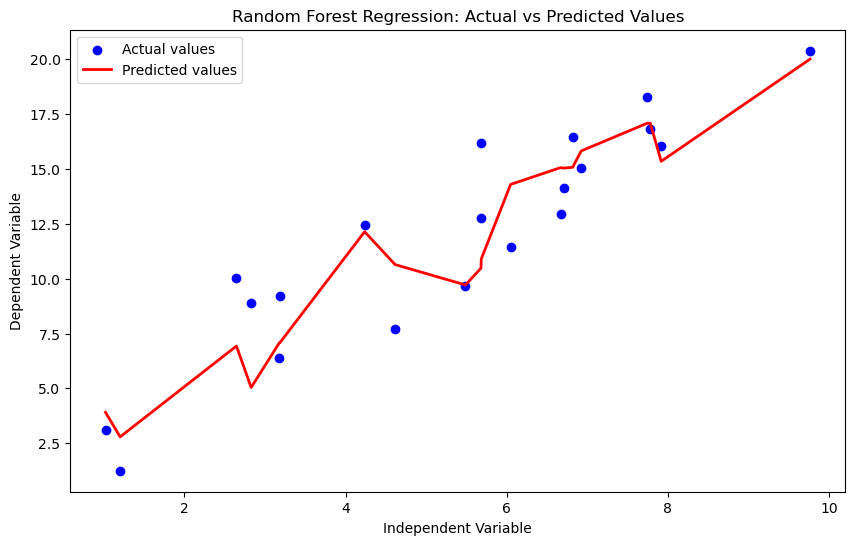

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Generate some random data for the example
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # 100 data points, 1 feature
y = 2 * X.squeeze() + 1 + np.random.randn(100) * 2  # Linear relation with noise

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R^2 Score: {r2}")

# Sorting the test data for plotting purposes
sorted_indices = np.argsort(X_test.squeeze())
X_test_sorted = X_test.squeeze()[sorted_indices]
y_test_sorted = y_test[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual values')
plt.plot(X_test_sorted, y_pred_sorted, color='red', linewidth=2, label='Predicted values')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.title('Random Forest Regression: Actual vs Predicted Values')
plt.legend()
plt.show()


In [63]:
data.columns

Index(['age', 'sex', 'pain type', 'BP', 'cholestrol', 'fbs', 'resting ecg',
       'max heart rate', 'exercise angina', 'ST depression', 'ST slope',
       'flouroscopy coloured', 'thal', 'heart disease'],
      dtype='object')